<img src="Logo.png" width="100" align="left"/> 

# <center>Data Analytics project:</center>



Congratulations on finishing the lessons content for this second unit !

We have seen a lot of concepts in the second unit and we had the chance to test some of them. Now, we get to see how these different concepts are used to better understand our data.

## Some guidelines: 
1. To run a cell you can use the shortcut use : Shift + Enter

2. Only sections mentioned as To-Do are the places where you should put in your own code other than that we do not recommend that you change the provided code.

3. You will be graded for the visibility of your code so make sure you respect the correct indentation and that your code contains suitable variables names.

4. This notebook is designed in a sequential way so if you solve your project on different days make sure to run the previous cells before you can run the one you want.

5. Teacher assistants in the slack space remain available to answer any questions you might have.

>Best of luck ! 

## Project Sections:
In this project you will practice some of the concepts seen in the data analytics unit, you will deal with a real dataset. This dataset contains house sale prices for King County. It includes homes sold between May 2014 and May 2015.

Our goal is to analyze this dataset, clean it then create a simple linear regression model using it.

This project is devided into n sections : 
1. [Setting the environement](#set_env)

2. [Importing necessary tools](#importing)

3. [Dataset discovery](#dataset_discovery)

4. [NA handling](#na_handling)

5. [Useless variables deletion](#useless_var)

6. [Outliers detection](#outliers)

7. [Feature selection](#feature_selection)

8. [Linear regression](#linear_reg)

### 1. Setting the environement:  <a id='set_env'></a>

In [395]:
# Make sure you have virtualenv installed 
!pip install --user virtualenv

In [396]:
# To-Do: create a virtual environement called data_analytics
!python -m venv data_analytics

In [397]:
# Activate the environement for windows
!.\data_analytics\Scripts\activate

In [398]:
# Activate the environement for linux (debian based)
! data_analytics/bin/activate

'data_analytics' n'est pas reconnu en tant que commande interne
ou externe, un programme ex‚cutable ou un fichier de commandes.


### 2. Importing necessary tools:<a id='importing'></a>

In [399]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### 3. Dataset discovery:<a id='dataset_discovery'></a>

In [423]:
# To-Do: Read the file ("kc_house_data.csv") using pandas and store in a dataframe called df
df = pd.read_csv('./kc_house_data.csv')
# To-Do: Print the dataframe's shape
print(df.shape)


(21613, 21)


In [424]:
# To-Do: Print the dataframe's info
print(df.info)


<bound method DataFrame.info of                id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0           1180.0    5650.0     1.0           0     0  ...      7   

### 4. NA handling:<a id='na_handling'></a>
It is clear after printing the dataset info that there are some variables that have less entries than the number of rows which means that some of them don't have values in certain rows.

Given the number of the na values, what do you think is the best method to deal with them?

In [425]:
# To-Do: deal with the NAs in your dataset in one line
df.dropna(inplace=True)


### 5. Useless variables deletion:<a id='useless_var'></a>
We want to eventually do a regression on it so naturally some variables bring no added value and can be delted without impacting the results.

Delete the column that correspond to variables that aren't needed.

In [426]:
# To-Do: delete the values of the variables that are useless
df.drop(inplace=True,axis=1,columns=['zipcode','lat','id','date'])

In [427]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21588 entries, 0 to 21612
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21588 non-null  float64
 1   bedrooms       21588 non-null  int64  
 2   bathrooms      21588 non-null  float64
 3   sqft_living    21588 non-null  float64
 4   sqft_lot       21588 non-null  float64
 5   floors         21588 non-null  float64
 6   waterfront     21588 non-null  int64  
 7   view           21588 non-null  int64  
 8   condition      21588 non-null  int64  
 9   grade          21588 non-null  int64  
 10  sqft_above     21588 non-null  float64
 11  sqft_basement  21588 non-null  int64  
 12  yr_built       21588 non-null  float64
 13  yr_renovated   21588 non-null  float64
 14  long           21588 non-null  float64
 15  sqft_living15  21588 non-null  float64
 16  sqft_lot15     21588 non-null  int64  
dtypes: float64(10), int64(7)
memory usage: 3.0 MB


### A wild playground appears !!
In the next cell, go wild with the dataset discovery.
You can calculate the mean, the median or do anything you want to learn more the data.

<b>Pro tip :</b> 
Sometimes you might want to know how many unique variables a column has, to do so you can use the padas function :

<center>pd.unique(df['column_name'])</center>

In [428]:
# To-Do : get to know more your data WITHOUT modifying it !!
df_mean = df.mean(axis=0)
df_meadian = df.median(axis=0)
df_Quantiles = [df.quantile(0.25),df.quantile(.5),df.quantile(.75)]
df_STD = df.std(axis=0)
for column in df:
    print('the unique values in',column,' is ',pd.unique(df[column]))


the unique values in price  is  [ 221900.  538000.  180000. ...  610685. 1007500.  402101.]
the unique values in bedrooms  is  [ 3  2  4  5  1  6  7  0  8  9 11 10 33]
the unique values in bathrooms  is  [1.   2.25 3.   2.   4.5  1.5  2.5  1.75 2.75 3.25 4.   3.5  0.75 4.75
 5.   4.25 3.75 0.   1.25 5.25 6.   0.5  5.5  6.75 5.75 8.   7.5  7.75
 6.25 6.5 ]
the unique values in sqft_living  is  [1180. 2570.  770. ... 3087. 3118. 1425.]
the unique values in sqft_lot  is  [ 5650.  7242. 10000. ...  5813.  2388.  1076.]
the unique values in floors  is  [1.  2.  1.5 3.  2.5 3.5]
the unique values in waterfront  is  [0 1]
the unique values in view  is  [0 3 4 2 1]
the unique values in condition  is  [3 5 4 1 2]
the unique values in grade  is  [ 7  6  8 11  9  5 10 12  4  3 13  1]
the unique values in sqft_above  is  [1180. 2170.  770. 1050. 1680. 3890. 1715. 1060. 1890. 1860.  860. 1430.
 1370. 1810. 1980. 1600. 1200. 1250. 2330. 2270. 1070. 2450. 1710. 1750.
 1400.  790. 2570. 2320. 1190. 15

### 6.Outliers detection:<a id='outliers'></a>
Having outliers is a common problem that might affect the quality of the model that we're building.

Let's assume that we're not interested in very expensive or very cheap houses, we want a model that best fits the average priced houses.

To create such a model, we detect outliers and delete them using the Z-score method seen in the lessons.

In [429]:
# To-Do : detect the outliers then delete them and delete the column created to calculate the Z-score
columns = list(df.columns)
z = pd.DataFrame(columns=list(df.columns))

for column in columns:
    z[column+'_zscore'] =((df[column] - df[column].mean())/df[column].std(ddof=0))
    # or df[column+'_zscore'] =((df[column] - df[column].mean())/df[column].std(ddof=0))

df = df[(abs(z) > 3 ).any(axis=1)]
# and then -> df = df[df['price_zscore']>3 & ... the rest of the columns]

In [430]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2908 entries, 1 to 21600
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          2908 non-null   float64
 1   bedrooms       2908 non-null   int64  
 2   bathrooms      2908 non-null   float64
 3   sqft_living    2908 non-null   float64
 4   sqft_lot       2908 non-null   float64
 5   floors         2908 non-null   float64
 6   waterfront     2908 non-null   int64  
 7   view           2908 non-null   int64  
 8   condition      2908 non-null   int64  
 9   grade          2908 non-null   int64  
 10  sqft_above     2908 non-null   float64
 11  sqft_basement  2908 non-null   int64  
 12  yr_built       2908 non-null   float64
 13  yr_renovated   2908 non-null   float64
 14  long           2908 non-null   float64
 15  sqft_living15  2908 non-null   float64
 16  sqft_lot15     2908 non-null   int64  
dtypes: float64(10), int64(7)
memory usage: 408.9 KB


### 7.Feature selection:<a id='feature_selection'></a>
It is clear that even after deleting some features, there might be other features that aren't obviously useless but can be delted and keep a good overall performance.

To verify this, we perform feature selection on our variables.

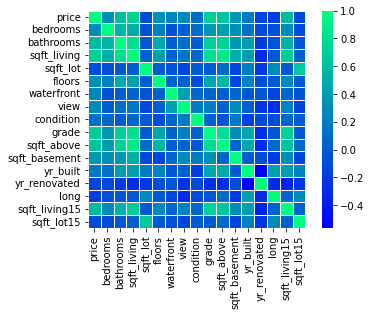

In [431]:
# To-Do : perform feature selection using correlation
df_corr = df.corr()
df_map = sns.heatmap(df_corr,linewidths=1,linecolor='white',square=True,cmap='winter')

In [432]:
# To-Do : drop the variables that seem highly correlated to you
df.drop(inplace=True,columns=['sqft_living','grade','sqft_above','sqft_living15','bathrooms'])

### 8.Linear regression:<a id='linear_reg'></a>
Now that our data is clean and ready to be used, let's try to fit it into a linear regression model.

<ul>
    <li>We begin by splitting our variables into dependant and independant variables.</li>
    <li>We create the model using the LinearRegression class.</li>
    <li>We evaluate our model using the R² score</li>
</ul>

In [440]:
# Splitting the data into dependant and independant variables
Y = df['price']
X = df.drop(['price'],axis = 1)


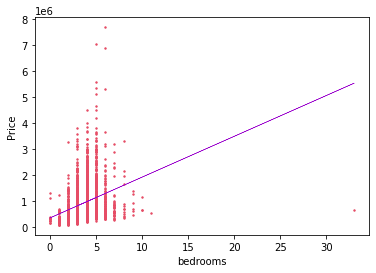

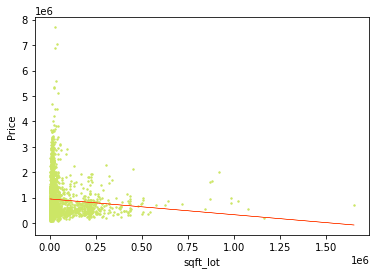

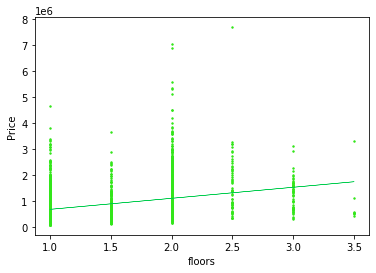

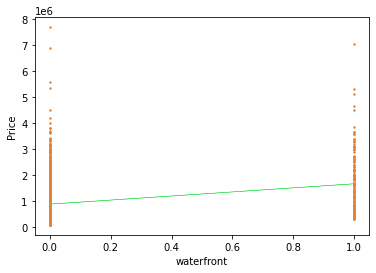

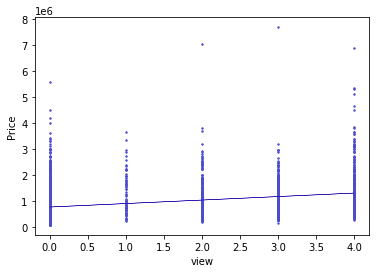

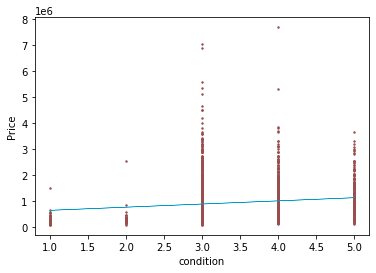

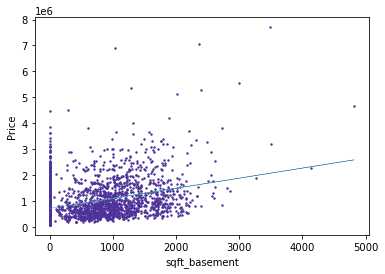

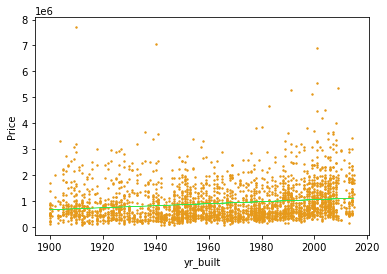

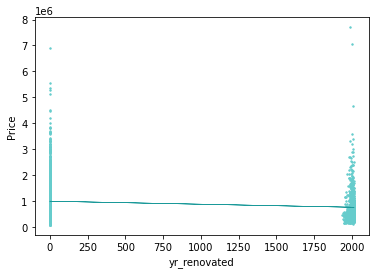

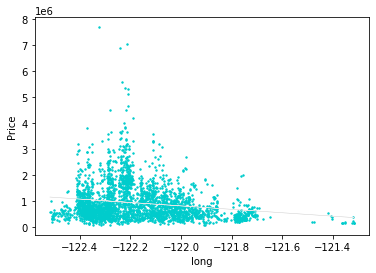

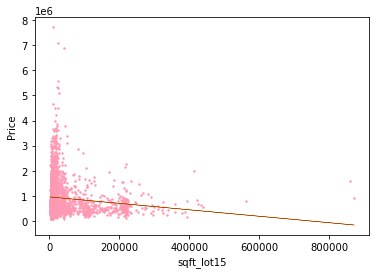

In [459]:
from sklearn.linear_model import LinearRegression
import random
# To-Do : Create a linear regression model using the LinearRegression class then fit it to the data

for x in X : 
  model = LinearRegression()
  model.fit(X[x].values.reshape(-1,1),Y.values.reshape(-1,1))
  pre = model.predict(X[x].values.reshape(-1,1))
  plt.scatter(X[x].values.reshape(-1,1),Y.values.reshape(-1,1),2,color=(round(random.uniform(0, 1),1), round(random.uniform(0, 1),1), round(random.uniform(0, 1),1)))
  plt.xlabel(x)
  plt.ylabel("Price")
  plt.plot(X[x].values.reshape(-1,1),pre, linewidth=0.5 , color=(round(random.uniform(0, 1),1), round(random.uniform(0, 1),1), round(random.uniform(0, 1),1)))
  plt.show()
  


In [462]:
# The function used to calculate the R² score is the method "score" found in the LinearRegression class
for x in X : 
 print('R² of ',x,'is :      ',result.score(X[x].values.reshape(-1,1), Y.values.reshape(-1,1)))

R² of  bedrooms is :       0.08571604450884562
R² of  sqft_lot is :       -659171183.2874811
R² of  floors is :       -0.16058385793391983
R² of  waterfront is :       -0.6405447471011241
R² of  view is :       -0.2386103247907012
R² of  condition is :       0.005857543203640847
R² of  sqft_basement is :       -35399.0751112252
R² of  yr_built is :       -195291.26765258992
R² of  yr_renovated is :       -63262.179560733835
R² of  long is :       -803.2198858254852
R² of  sqft_lot15 is :       -289623186.0120429


## Conclusion:
Data preparation is a very important step in the machine learning pipeline. It is crucial to clean our data and understand it very well before we can create any model on the data.

In this notebook, we have spent 4 steps preparing our data but only 1 to create the model. This reflects how time consuming the process of data preparation is compared to the other steps as well as the importance of the quality of the data used.

In the next unit, we will see more about the models creation process and see a lot of important concepts in depth.